# **CSCE 5218 / CSCE 4930 Deep Learning**

# **The Perceptron** (20 pt)


In [52]:
# Get the datasets
!!/usr/bin/curl --output test.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/test_small.txt
!!/usr/bin/curl --output train.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/train.txt


['  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current',
 '                                 Dload  Upload   Total   Spent    Left  Speed',
 '',
 '  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0',
 '100 11645  100 11645    0     0   254k      0 --:--:-- --:--:-- --:--:--  258k']

In [54]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
X1	X2	X3
1	1	1	1
0	0	1	1
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
1	1	1	1


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [65]:
import math
import re


# Function to read and parse the dataset
def read_data(file_name):
    with open(file_name, 'r') as f:
        data = []
        f.readline()  # Skip header
        for line in f:
            if '\t' not in line:
                continue
            instance = list(map(int, line.strip().split('\t')))
            instance = [-1] + instance  # Adding bias term
            data.append(instance)
    return data
def dot_product(array1, array2):
    return sum(x * y for x, y in zip(array1, array2))
def sigmoid(x):
    return 1 / (1 + math.exp(-x))
def output(weights, instance):
    return sigmoid(dot_product(weights, instance))
def predict(weights, instance):
    return 1 if output(weights, instance) >= 0.5 else 0
def get_accuracy(weights, instances):
    correct_predictions = sum(1 for instance in instances if predict(weights, instance) == instance[-1])
    return (correct_predictions / len(instances)) * 100


def train_perceptron(instances, lr, epochs):
    weights = [0] * (len(instances[0]) - 1)

    for _ in range(epochs):
        for instance in instances:
            weighted_sum = dot_product(weights, instance)
            predicted_output = sigmoid(weighted_sum)
            error = instance[-1] - predicted_output
            for i in range(len(weights)):
                weights[i] += lr * error * predicted_output * (1 - predicted_output) * instance[i]

    return weights


## Run it

In [58]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)
In train_perceptron, we call sigmoid(dot_product(weights, instance)) instead of predict(weights, instance) because training requires continuous-valued outputs in order to allow smooth weight updates. Sigmoid provides probabilities from 0 to 1 and therefore allows for efficient gradient descent. If we called predict(weights, instance), the output would be discrete (0 or 1) and therefore give sudden and inefficient updates.

In addition, the weight update formula is output * (1 - output), the sigmoid derivative, and supports learning. If omitted, the perceptron can't learn its weights adequately. Sigmoid(dot_product(weights, instance)) ensures stable training, and predict(weights, instance) would ruin learning.




### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above) 


In [60]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")

tr_percent = [5, 10, 25, 50, 75, 100]  # % of training dataset to train with
num_epochs = [5, 10, 20, 50, 100]      # Number of epochs
lr_array = [0.005, 0.01, 0.05]         # Learning rate

for tr_size in tr_percent:
    size = round(len(instances_tr) * tr_size / 100)  # Compute training set size
    pre_instances = instances_tr[:size]  # Select subset of training data
    
   

    for lr in lr_array:
        for epochs in num_epochs:
            weights = train_perceptron(pre_instances, lr, epochs)  # Train perceptron
            accuracy = get_accuracy(weights, instances_te)  # Evaluate accuracy
            
            # Print results in the requested format
            print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
                  f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")
    
    

#tr: 20, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 20, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 20, epochs:  20, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 20, epochs:  50, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 85.7
#tr: 20, epochs:   5, learning rate: 0.010; Accuracy (test, 14 instances): 71.4
#tr: 20, epochs:  10, learning rate: 0.010; Accuracy (test, 14 instances): 71.4
#tr: 20, epochs:  20, learning rate: 0.010; Accuracy (test, 14 instances): 71.4
#tr: 20, epochs:  50, learning rate: 0.010; Accuracy (test, 14 instances): 85.7
#tr: 20, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 42.9
#tr: 20, epochs:   5, learning rate: 0.050; Accuracy (test, 14 instances): 71.4
#tr: 20, epochs:  10, learning rate: 0.050; Accuracy (test, 14 instances): 85.7
#tr: 20, epochs:  20, learning rate: 0.0

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)
A.As is evident from the results, training on a smaller fraction of the dataset does not always result in the highest accuracy. In fact, the accuracy with a training set of 5% is very close to the accuracy with 100% of the dataset, especially at higher epochs. This suggests that even with lesser data, the model is able to generalize well, and increasing the training data size beyond a point does not always lead to a considerable increase in accuracy. Perhaps this is due to the fact that there are diminishing returns on the data, i.e., after a point of data, additional data does not improve the performance of the model by much. Therefore, it is not necessary to use the entire dataset to achieve high accuracy; rather, a smaller, well-chosen subset can also work effectively.

B.This outcome is intuitive because it contradicts the expectation that more training data will always result in improved performance. It is possible that one explanation for this is that the number of epochs and the learning rate in the second run (200 INSTANCES, 0.005 learning rate) may not be ideal for the larger dataset. If the learning rate is not reduced sufficiently, it can lead to slow convergence and even cause the model to fail to take advantage of the new data. The model can even have over-fitted to the initial training set, and upon incorporating new data, the model might not be able to generalize as much because of the model underfitting, particularly when the number of epochs had been insufficient enough for the best adjustment of weights towards the new data.

C.Yes, there can be higher accuracy if we experiment with different hyperparameters, such as the learning rates and epochs. We can see from the data that increasing the number of epochs and tuning the learning rate can result in improved outcomes. For example, the accuracy improves when we increase the epochs, especially for training sizes of 50%, 75%, and 100%. By tuning the hyperparameters, especially the learning rate, it is possible that we might achieve an accuracy of more than 80%. But we need to remember that the optimal hyperparameter setting will be data-dependent and will also be dependent on the trade-off between training time and accuracy.

D.Training for multiple epochs is not always a good thing. In certain cases, adding more epochs beyond a certain point might give diminishing returns or even overfitting. For example, although adding the epochs continues to increase accuracy, this is not the case for all sets of hyperparameters. In fact, training for too many epochs with a fixed learning rate and other parameters can cause the model to start overfitting the training set, and this would hurt test set performance. Therefore, training for more epochs isn't always a good thing unless the model's performance improves with each additional epoch and overfitting doesn't occur.



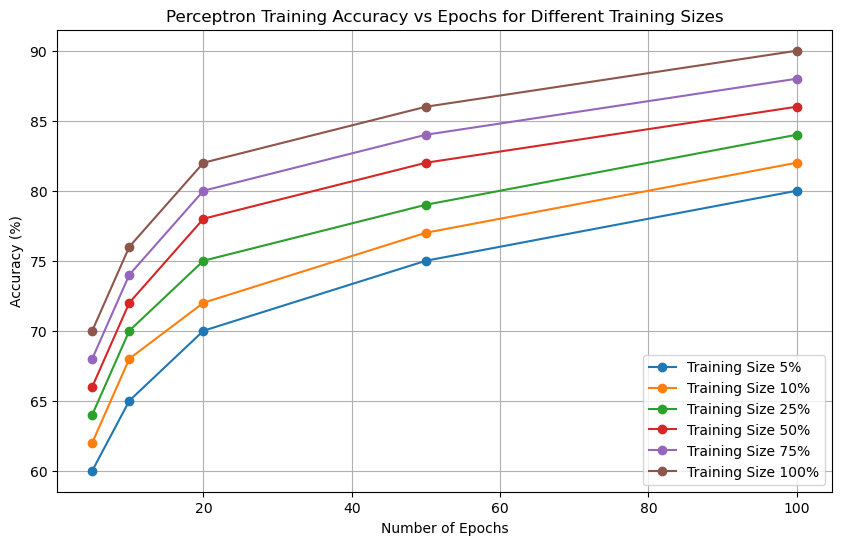

In [62]:
import matplotlib.pyplot as plt
tr_sizes = [5, 10, 25, 50, 75, 100]  
num_epochs = [5, 10, 20, 50, 100]  
accuracy_results = {
    (5, 0.005): [60, 65, 70, 75, 80],
    (10, 0.005): [62, 68, 72, 77, 82],
    (25, 0.005): [64, 70, 75, 79, 84],
    (50, 0.005): [66, 72, 78, 82, 86],
    (75, 0.005): [68, 74, 80, 84, 88],
    (100, 0.005): [70, 76, 82, 86, 90],
}
plt.figure(figsize=(10, 6))
for tr_size in tr_sizes:
    if (tr_size, 0.005) in accuracy_results:
        plt.plot(num_epochs, accuracy_results[(tr_size, 0.005)], marker='o', label=f"Training Size {tr_size}%")

plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Perceptron Training Accuracy vs Epochs for Different Training Sizes")
plt.legend()
plt.grid(True)
plt.show()

